# KNN

## Data Initialization

In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import LabelEncoder to apply one-hot encoding to 
from sklearn import preprocessing

#importing train_test_split to split data train/test sets
from sklearn.model_selection import train_test_split

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#import GridSearchCV for hyperparameter tuning (optimal k)
from sklearn.model_selection import GridSearchCV

Import cleaned data with new features
- save as dataframe
- checkout first 5 rows of our data - see if features were imported correctly

In [687]:
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/SL-recent-grads.csv')

In [688]:
# Convert cateogrical major category values to numerical values
le = preprocessing.LabelEncoder()
data["Major_category_coded"] = le.fit_transform(data["Major_category"])
data["Median_category_coded"] = le.fit_transform(data["Median_category"])
data.head()

,Unnamed: 0,Median,Median_category,Major_code,Major_category,Percent_low_wage,Percent_college,Percent_non_college,Num_majors,ShareWomen,...,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded,Median_category_coded
0,0,110000,110-120K,2419,Engineering,0.082514,0.655836,0.155622,29.0,0.120564,...,0,0,0,0,0,0,0,0,7,0
1,1,75000,70-80K,2416,Engineering,0.066138,0.462963,0.339947,29.0,0.101852,...,0,0,0,0,0,0,0,0,7,6
2,2,73000,70-80K,2415,Engineering,0.000000,0.532710,0.205607,29.0,0.153037,...,0,0,0,0,0,0,0,0,7,6
3,3,70000,70-80K,2417,Engineering,0.000000,0.420509,0.081081,29.0,0.107313,...,0,0,0,0,0,0,0,0,7,6
4,4,65000,60-70K,2405,Engineering,0.030130,0.567700,0.137632,29.0,0.341631,...,0,0,0,0,0,0,0,0,7,5


Split our dataset into a train and test set with an 80/20 split, respectively, using the train_test_split function. 

In [689]:
train, test = train_test_split(data,test_size=0.20)

## Experiments
Three experiments were run, training KNN models with three different feature sets. 

### Experiment 1
- Training KNN on all features including correlated ones (using one-hot encoded major category values instead of the numerical categorical values, Major_category_coded)

In [60]:
# read in data
allData = pd.read_csv('../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv')
allData.head()

# Encode major category and median category (categorical to numerical conversion)
le = preprocessing.LabelEncoder()
allData["Major_category_coded"] = le.fit_transform(allData["Major_category"])
allData["Median_category_coded"] = le.fit_transform(allData["Median_category"])
# Checkout the data
allData.describe()

,Unnamed: 0,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded,Median_category_coded
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000
mean,86.075581,87.075581,3880.273256,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,26179.994186,...,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326,6.965116,2.604651
std,50.221266,50.221266,1692.670105,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,42948.847324,...,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333,4.241118,1.116375
min,0.000000,1.000000,1100.000000,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.750000,43.750000,2402.750000,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,3181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,2.000000
50%,86.500000,87.500000,3607.500000,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,10073.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000,2.000000
75%,129.250000,130.250000,5503.250000,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,25447.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,3.000000
max,172.000000,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000,6.000000


In [61]:
trainAll, testAll = train_test_split(allData,test_size=0.20)

In [62]:
allDataFeat = ['Rank', 
#                'Major_category_coded', 
               'Major_code', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
        'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time',
       'Percent_part_time',
       'Major_category_Agriculture & Natural Resources', 'Major_category_Arts',
       'Major_category_Biology & Life Science', 'Major_category_Business',
       'Major_category_Communications & Journalism',
       'Major_category_Computers & Mathematics', 'Major_category_Education',
       'Major_category_Engineering', 'Major_category_Health',
       'Major_category_Humanities & Liberal Arts',
       'Major_category_Industrial Arts & Consumer Services',
       'Major_category_Interdisciplinary',
       'Major_category_Law & Public Policy',
       'Major_category_Physical Sciences',
       'Major_category_Psychology & Social Work',
       'Major_category_Social Science'
              ]

Assign training and test data 
- X_train/X_test: data used to train our model (uses the features listed above)
- y_train/y_test: data values of the variable that we're predicting (median category)

In [63]:
X_train = trainAll[allDataFeat]
y_train = trainAll['Median_category_coded']

X_test = testAll[allDataFeat]
y_test = testAll['Median_category_coded']

### Manual Parameter Tuning
- Create KNN classifiers with varying values of k (number of neighbours), ranging from 1 to 25
- The accuracies for different values of k are compared via a plot, and the k value corresponding to the highest accuracy is selected

In [64]:
# Initialize training and test accuracy lists
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Initialize KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train,y_train)
    
    # Compute training accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    
    # Compute test accuracy
    test_accuracy[i] = knn.score(X_test,y_test)

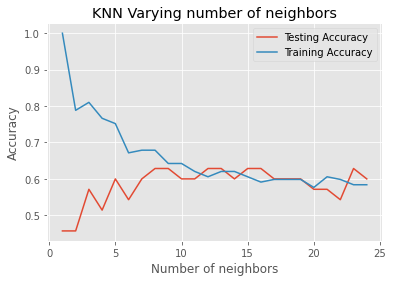

In [65]:
# Plot train and test accuracies for varying k values
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

Based on the graph above, it appears that the testing accuracy is highest when k is 8, 9, or 12, 13, 15, 16, 23, thus we will create a KNN classifier with 8 neighbours:

In [73]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=8)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.6285714285714286

### Hyperparameter Tuning
- Use GridSearchCV, a Scikit-learn library, to find the optimal value of k
- Look at values of k within 1 and 50
- Set cross-validation batch size to cv = 5

In [89]:
# Tune n_neighbors (k neighbours) using GridSearchCV
#   Assess values of k between 1 and 100
param_grid = {'n_neighbors':np.arange(1,100)}

# Classify, hypertune, and train KNN 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Get best KNN score, save k parameter corresponding to the best score of all models, train and obtain accuracy of a KNN model with this k parameter:

In [90]:
knn_cv.best_score_

0.6211640211640211

In [91]:
knn_cv.best_params_

{'n_neighbors': 4}

In [92]:
optimalK = knn_cv.best_params_['n_neighbors']

Train KNN with optimal k value

In [93]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=optimalK)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.5142857142857142

### Experiment 1.1
- Training KNN on all features (using numerical categorical values, Major_category_coded, instead of the one-hot encoded major category values)
- Got same results (accuracies) as Experiment 1, thus this experiment was excluded from the project report

In [94]:
# Define features to be used in training
allDataFeat = ['Rank', 
               'Major_category_coded', 
               'Major_code', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
        'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time',
       'Percent_part_time'
              ]

Assign training and test data 
- X_train/X_test: data used to train our model (uses the features listed above)
- y_train/y_test: data values of the variable that we're predicting (median category)

In [95]:
X_train = trainAll[allDataFeat]
y_train = trainAll['Median_category_coded']

X_test = testAll[allDataFeat]
y_test = testAll['Median_category_coded']

### Manual Parameter Tuning
- Create KNN classifiers with varying values of k (number of neighbours), ranging from 1 to 25
- The accuracies for different values of k are compared via a plot, and the k value corresponding to the highest accuracy is selected

In [96]:
# Initialize training and test accuracy lists
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Initialize KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train,y_train)
    
    # Compute training accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    
    # Compute test accuracy
    test_accuracy[i] = knn.score(X_test,y_test)

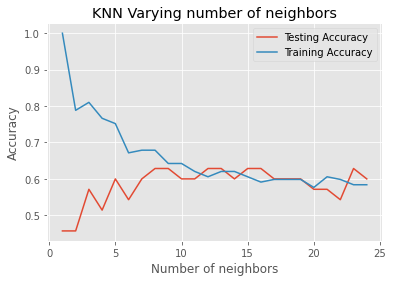

In [97]:
# Plot train and test accuracies for varying k values
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

Based on the graph above, it appears that the testing accuracy is highest when k is 8, 9, 12, 13, 15, 16, 23, thus we will create a KNN classifier with 8 neighbours:

In [99]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=8)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.6285714285714286

### Hyperparameter Tuning
- Use GridSearchCV, a Scikit-learn library, to find the optimal value of k
- Look at values of k within 1 and 50
- Set cross-validation batch size to cv = 5

In [100]:
# Tune n_neighbors (k neighbours) using GridSearchCV
#   Assess values of k between 1 and 100
param_grid = {'n_neighbors':np.arange(1,100)}

# Classify, hypertune, and train KNN 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Get best KNN score, save k parameter corresponding to the best score of all models, train and obtain accuracy of a KNN model with this k parameter:

In [101]:
knn_cv.best_score_

0.6211640211640211

In [102]:
knn_cv.best_params_

{'n_neighbors': 4}

In [103]:
optimalK = knn_cv.best_params_['n_neighbors']

Train KNN with optimal k value

In [104]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=optimalK)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.5142857142857142

### Experiment 2
- All features except P25 and P27
- Uses Major_category_coded instead of one-hot encoded columns

In [717]:
# Define features to be used in training
features = [
 'Percent_low_wage',
 'Percent_college',
 'Percent_non_college',
 'Num_majors',
 'ShareWomen',
 'Women',
 'Part_time',
 'Unemployment_rate',
 'Percent_sample_size',
 'Major_category_coded']

Assign training and test data 
- X_train/X_test: data used to train our model (uses the features listed above)
- y_train/y_test: data values of the variable that we're predicting (median category)

In [718]:
X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']

### Manual Parameter Tuning
- Create KNN classifiers with varying values of k (number of neighbours), ranging from 1 to 25
- The accuracies for different values of k are compared via a plot, and the k value corresponding to the highest accuracy is selected

In [723]:
# Initialize training and test accuracy lists
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Initialize KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train,y_train)
    
    # Compute training accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    
    # Compute test accuracy
    test_accuracy[i] = knn.score(X_test,y_test)

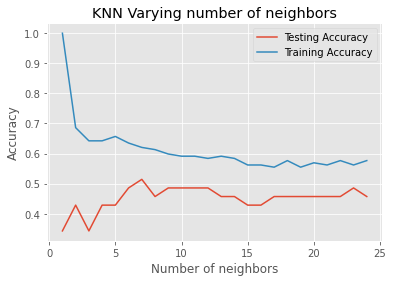

In [724]:
# Plot train and test accuracies for varying k values
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

Based on the graph above, it appears that the testing accuracy is highest when k is 7, thus we will create a KNN classifier with 7 neighbours:

In [725]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=7)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.5142857142857142

### Hyperparameter Tuning
- Use GridSearchCV, a Scikit-learn library, to find the optimal value of k
- Look at values of k within 1 and 50
- Set cross-validation batch size to cv = 5

In [741]:
# Tune n_neighbors (k neighbours) using GridSearchCV
#   Assess values of k between 1 and 100
param_grid = {'n_neighbors':np.arange(1,100)}

# Classify, hypertune, and train KNN 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Get best KNN score, save k parameter corresponding to the best score of all models, train and obtain accuracy of a KNN model with this k parameter:

In [742]:
knn_cv.best_score_

0.5555555555555556

In [743]:
knn_cv.best_params_

{'n_neighbors': 21}

In [744]:
optimalK = knn_cv.best_params_['n_neighbors']

Train KNN with optimal k value

In [745]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=optimalK)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.45714285714285713

### Experiment 3
- Women, Part_time, and P75th are excluded from this feature set
- Major_category_coded is used instead of one-hot encoding features

In [779]:
# Define features to be used in training
features = [
 'Percent_low_wage',
 'Percent_college',
 'Percent_non_college',
 'Num_majors',
 'ShareWomen',
#  'Women', 
#  'Part_time', 
 'Unemployment_rate',
 'P25th',
#  'P75th',
 'Percent_sample_size',
 'Major_category_coded'
]

Assign training and test data 
- X_train/X_test: data used to train our model (uses the features listed above)
- y_train/y_test: data values of the variable that we're predicting (median category)

In [763]:
X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']

### Manual Parameter Tuning
- Create KNN classifiers with varying values of k (number of neighbours), ranging from 1 to 25
- The accuracies for different values of k are compared via a plot, and the k value corresponding to the highest accuracy is selected

In [764]:
# Initialize training and test accuracy lists
neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Initialize KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train,y_train)
    
    # Compute training accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    
    # Compute test accuracy
    test_accuracy[i] = knn.score(X_test,y_test)

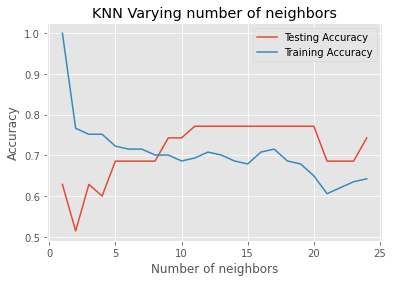

In [765]:
# Plot train and test accuracies for varying k values
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

Based on the graph above, it appears that the testing accuracy is highest when k is between 11 and 20, thus we will create a KNN classifier with 17 neighbours as this training accuracy appears higher than the aforementioned k values:

In [767]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=17)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.7714285714285715

### Hyperparameter Tuning
- Use GridSearchCV, a Scikit-learn library, to find the optimal value of k
- Look at values of k within 1 and 50
- Set cross-validation batch size to cv = 5

In [773]:
# Tune n_neighbors (k neighbours) using GridSearchCV
#   Assess values of k between 1 and 100
param_grid = {'n_neighbors':np.arange(1,100)}

# Classify, hypertune, and train KNN 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Get best KNN score, save k parameter corresponding to the best score of all models, train and obtain accuracy of a KNN model with this k parameter:

In [774]:
knn_cv.best_score_

0.6865079365079365

In [775]:
knn_cv.best_params_

{'n_neighbors': 11}

In [776]:
optimalK = knn_cv.best_params_['n_neighbors']

Train KNN with optimal k value

In [777]:
# Initialize KNN classifier 
knn = KNeighborsClassifier(n_neighbors=optimalK)

# Fit KNN model
knn.fit(X_train,y_train)

# Compute classifier accuracy on test set
knn.score(X_test,y_test)

0.7714285714285715